<a href="https://colab.research.google.com/github/t29mato/notebook/blob/main/Rent_Analysis_Lagzena_Chigen_61.61_SqM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.homes.co.jp/archive/b-8064555/
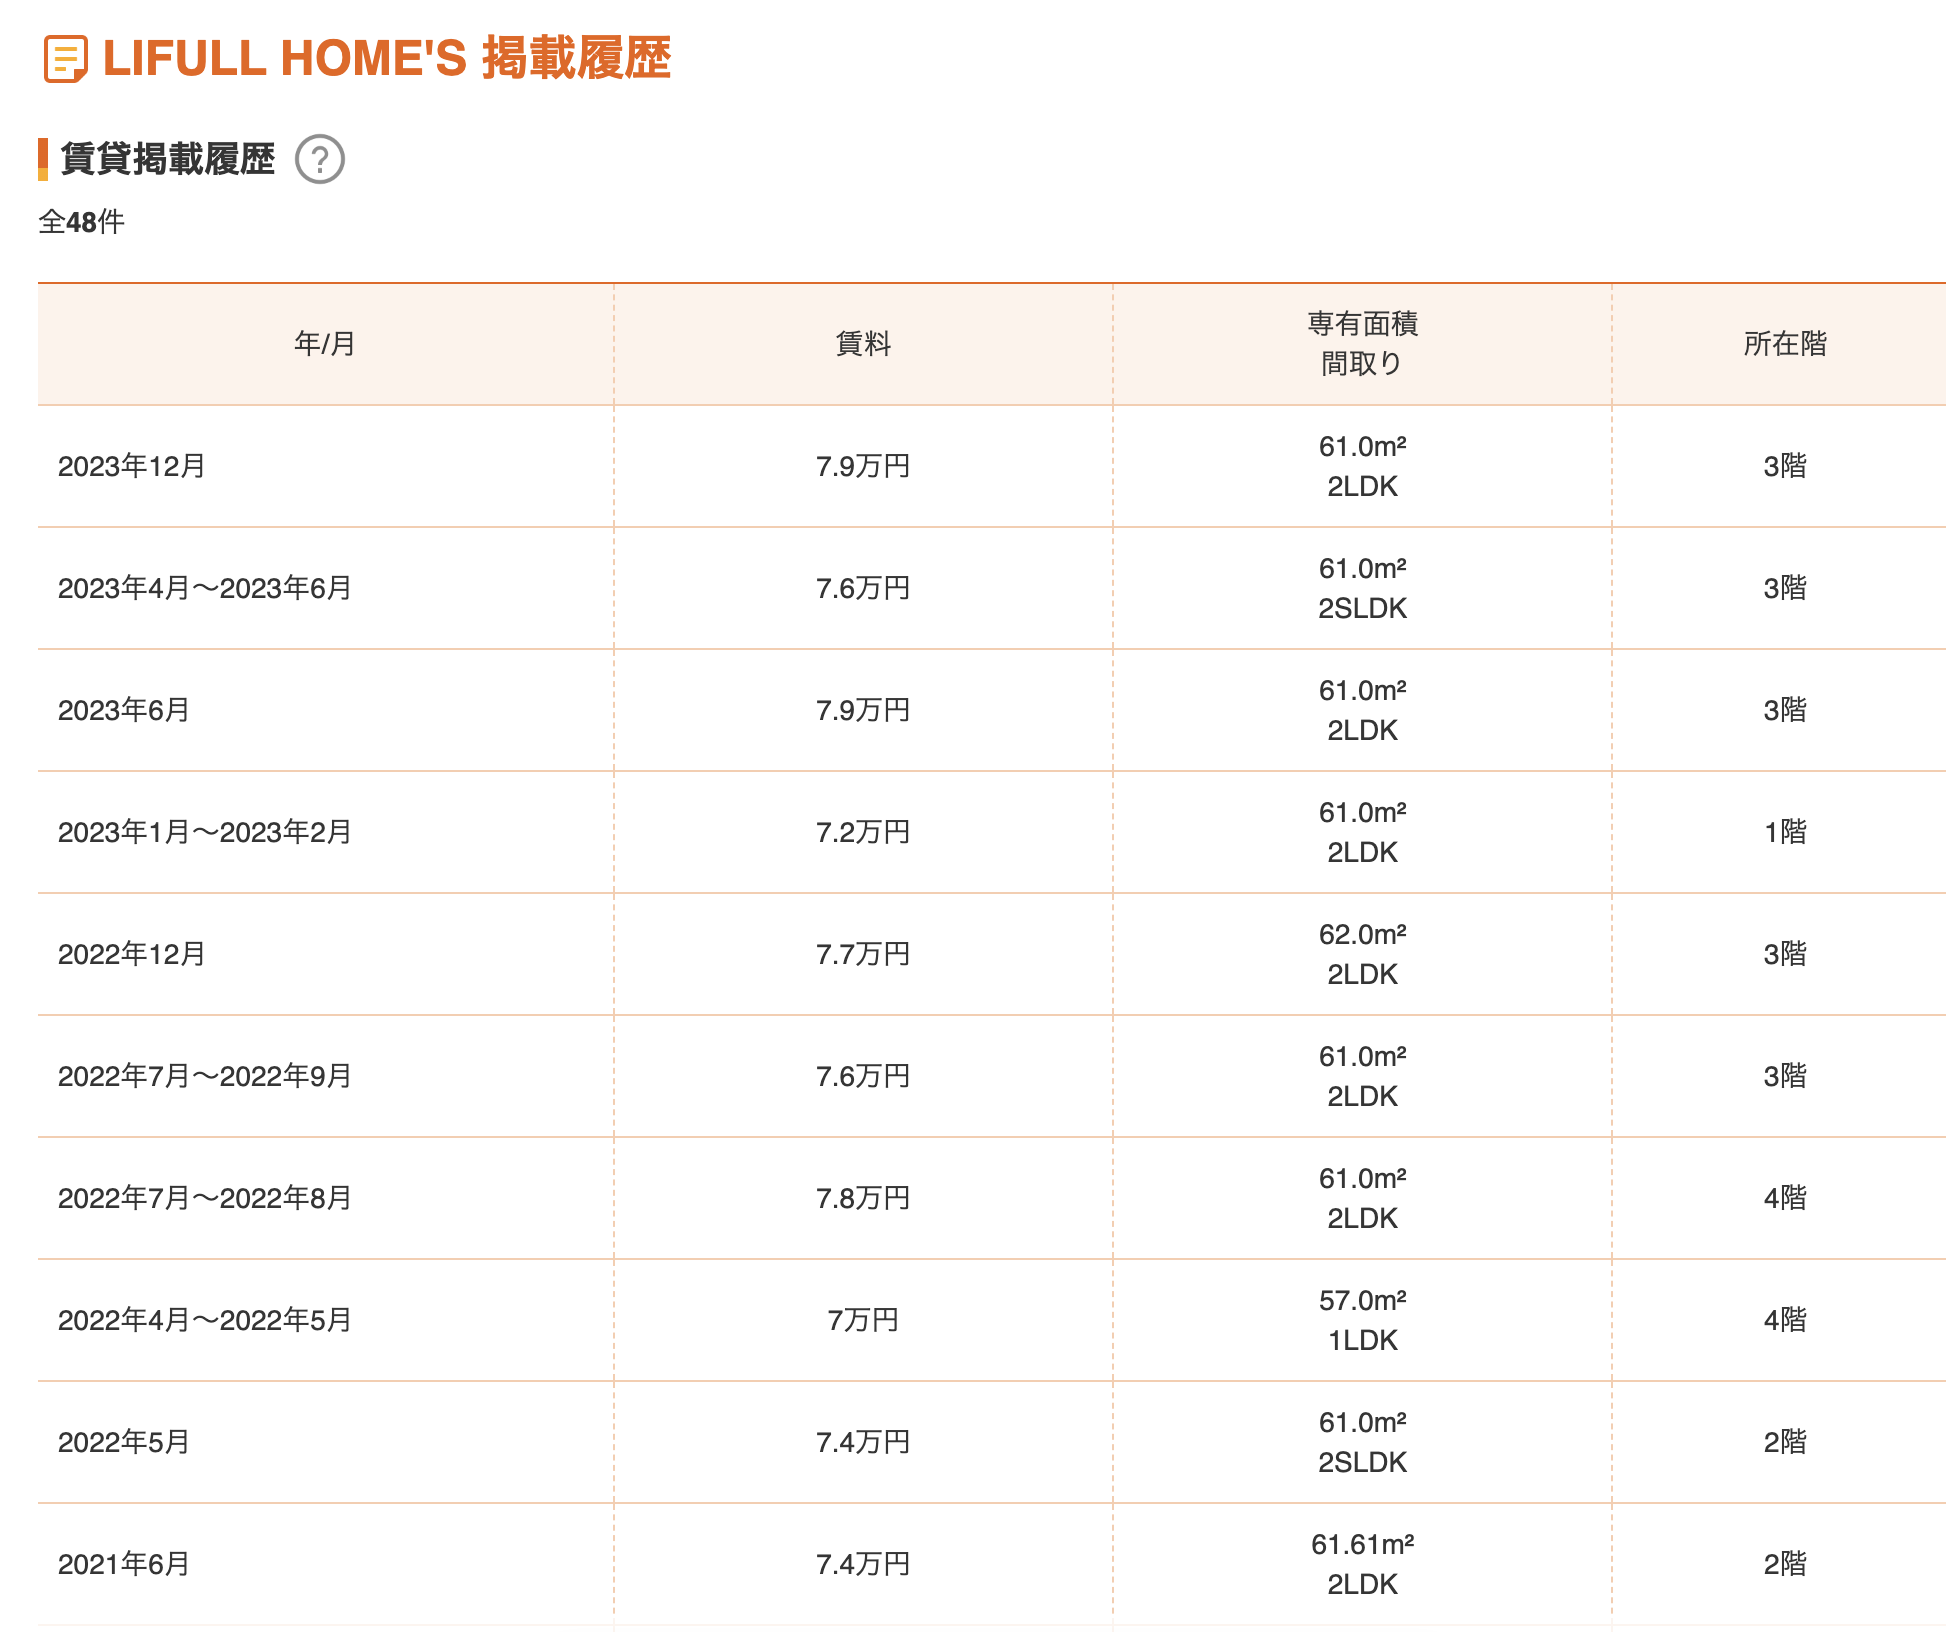

https://chat.openai.com/share/1910fe5e-95a9-4903-8a3c-2fde27cf6b2a

In [1]:
import pandas as pd
from io import StringIO


In [2]:
# prompt: /content/sample_data/ラグゼナ千現_price_history.csvから読み込み
csv_text = """
年/月,賃料,専有面積,間取り,所在階
2023年12月,7.9万円,61.0m²,2LDK,3階
2023年4月〜2023年6月,7.6万円,61.0m²,2SLDK,3階
2023年6月,7.9万円,61.0m²,2LDK,3階
2023年1月〜2023年2月,7.2万円,61.0m²,2LDK,1階
2022年12月,7.7万円,62.0m²,2LDK,3階
2022年7月〜2022年9月,7.6万円,61.0m²,2LDK,3階
2022年7月〜2022年8月,7.8万円,61.0m²,2LDK,4階
2022年4月〜2022年5月,7万円,57.0m²,1LDK,4階
2022年5月,7.4万円,61.0m²,2SLDK,2階
2021年6月,7.4万円,61.61m²,2LDK,2階
2021年4月〜2021年5月,7.4万円,61.61m²,2LDK,2階
2020年2月〜2020年6月,7.6万円,61.61m²,2LDK,2階
2020年5月〜2020年6月,7.2万円,61.61m²,2LDK,4階
2020年5月〜2020年6月,7.7万円,61.61m²,2LDK,3階
2020年6月,7.2万円,62.12m²,2LDK,1階
2020年4月,7.7万円,61.61m²,2LDK,3階
2019年12月〜2020年1月,7.3万円,61.61m²,2LDK,4階
2019年7月〜2019年11月,7.2万円,62.12m²,2LDK,1階
2019年3月〜2019年8月,7.2万円,61.61m²,2LDK,1階
2019年3月〜2019年6月,7.2万円,61.61m²,2SLDK,1階
2018年11月〜2019年4月,7.5万円,61.61m²,2LDK,2階
2018年10月〜2019年3月,7.5万円,61.61m²,2LDK,2階
2018年12月〜2019年2月,7.7万円,62.12m²,2LDK,2階
2018年10月〜2019年1月,7.2万円,61.61m²,2SLDK,1階
2018年1月〜2018年3月,6.7万円,57.37m²,1LDK,4階
2018年1月〜2018年3月,7.2万円,61.61m²,2SLDK,1階
2018年1月〜2018年3月,7.2万円,61.61m²,2SLDK,1階
2018年3月,6.7万円,57.37m²,1LDK,2階
2018年1月〜2018年2月,7.2万円,61.61m²,2LDK,3階
2018年1月,7.2万円,61.61m²,2LDK,4階
2018年1月,7.2万円,61.61m²,2LDK,2階
2016年2月〜2016年3月,6.5万円,57.37m²,1LDK,2階
2016年3月,7.5万円,61.61m²,2LDK,3階
2016年3月,6.5万円,57.37m²,1LDK,1階
2015年8月〜2016年1月,8.1万円,57.37m²,1LDK,2階
2015年6月,8.1万円,57.37m²,1LDK,2階
2015年1月〜2015年3月,8.5万円,62.12m²,2LDK,3階
2014年9月〜2014年11月,8.5万円,62.12m²,2LDK,3階
2014年3月〜2014年9月,7.7万円,57.37m²,1LDK,1階
2014年3月〜2014年8月,7.8万円,57.37m²,1LDK,2階
2013年11月〜2014年1月,7.7万円,57.37m²,1LDK,1階
2013年11月〜2014年1月,7.8万円,61.61m²,2LDK,1階
2013年6月〜2013年7月,8.2万円,61.61m²,2LDK,4階
2013年6月〜2013年7月,7.8万円,61.61m²,2LDK,1階
2013年5月〜2013年6月,8.3万円,61.61m²,2SLDK,2階
2009年4月〜2010年6月,9.5万円,61.61m²,2SLDK,2階
2009年4月〜2010年6月,8.6万円,57.37m²,1LDK,1階
2010年6月,9.7万円,62.12m²,2LDK,3階
"""

df = pd.read_csv(StringIO(csv_text))
df.head()


,年/月,賃料,専有面積,間取り,所在階
0,2023年12月,7.9万円,61.0m²,2LDK,3階
1,2023年4月〜2023年6月,7.6万円,61.0m²,2SLDK,3階
2,2023年6月,7.9万円,61.0m²,2LDK,3階
3,2023年1月〜2023年2月,7.2万円,61.0m²,2LDK,1階
4,2022年12月,7.7万円,62.0m²,2LDK,3階


In [3]:
from datetime import datetime

def convert_to_date(year_month_str):
    # 年月の文字列を日付オブジェクトに変換する関数
    year_month_str = year_month_str.replace('年', '-').replace('月', '')

    # 年月の範囲表記の場合を処理
    if '〜' in year_month_str:
        start_year_month, end_year_month = year_month_str.split('〜')
        start_date = datetime.strptime(start_year_month, '%Y-%m')
        end_date = datetime.strptime(end_year_month, '%Y-%m')
        return start_date, end_date

    # 通常の年月表記の場合を処理
    else:
        date = datetime.strptime(year_month_str, '%Y-%m')
        return date

In [4]:
# prompt: convert_to_date関数を年/月カラムに実行してください

df['year_month'] = df['年/月'].apply(convert_to_date)


In [5]:
df

,年/月,賃料,専有面積,間取り,所在階,year_month
0,2023年12月,7.9万円,61.0m²,2LDK,3階,2023-12-01 00:00:00
1,2023年4月〜2023年6月,7.6万円,61.0m²,2SLDK,3階,"(2023-04-01 00:00:00, 2023-06-01 00:00:00)"
2,2023年6月,7.9万円,61.0m²,2LDK,3階,2023-06-01 00:00:00
3,2023年1月〜2023年2月,7.2万円,61.0m²,2LDK,1階,"(2023-01-01 00:00:00, 2023-02-01 00:00:00)"
4,2022年12月,7.7万円,62.0m²,2LDK,3階,2022-12-01 00:00:00
5,2022年7月〜2022年9月,7.6万円,61.0m²,2LDK,3階,"(2022-07-01 00:00:00, 2022-09-01 00:00:00)"
6,2022年7月〜2022年8月,7.8万円,61.0m²,2LDK,4階,"(2022-07-01 00:00:00, 2022-08-01 00:00:00)"
7,2022年4月〜2022年5月,7万円,57.0m²,1LDK,4階,"(2022-04-01 00:00:00, 2022-05-01 00:00:00)"
8,2022年5月,7.4万円,61.0m²,2SLDK,2階,2022-05-01 00:00:00
9,2021年6月,7.4万円,61.61m²,2LDK,2階,2021-06-01 00:00:00


In [6]:
df[(df['間取り'] == "2LDK") & (df['所在階'] == "3階") & (df['専有面積'] == "61.61m²")]


,年/月,賃料,専有面積,間取り,所在階,year_month
13,2020年5月〜2020年6月,7.7万円,61.61m²,2LDK,3階,"(2020-05-01 00:00:00, 2020-06-01 00:00:00)"
15,2020年4月,7.7万円,61.61m²,2LDK,3階,2020-04-01 00:00:00
28,2018年1月〜2018年2月,7.2万円,61.61m²,2LDK,3階,"(2018-01-01 00:00:00, 2018-02-01 00:00:00)"
32,2016年3月,7.5万円,61.61m²,2LDK,3階,2016-03-01 00:00:00


In [7]:
df[df['所在階'].isin(["2階", "3階", "4階"]) & (df['専有面積'] == "61.61m²")]


,年/月,賃料,専有面積,間取り,所在階,year_month
9,2021年6月,7.4万円,61.61m²,2LDK,2階,2021-06-01 00:00:00
10,2021年4月〜2021年5月,7.4万円,61.61m²,2LDK,2階,"(2021-04-01 00:00:00, 2021-05-01 00:00:00)"
11,2020年2月〜2020年6月,7.6万円,61.61m²,2LDK,2階,"(2020-02-01 00:00:00, 2020-06-01 00:00:00)"
12,2020年5月〜2020年6月,7.2万円,61.61m²,2LDK,4階,"(2020-05-01 00:00:00, 2020-06-01 00:00:00)"
13,2020年5月〜2020年6月,7.7万円,61.61m²,2LDK,3階,"(2020-05-01 00:00:00, 2020-06-01 00:00:00)"
15,2020年4月,7.7万円,61.61m²,2LDK,3階,2020-04-01 00:00:00
16,2019年12月〜2020年1月,7.3万円,61.61m²,2LDK,4階,"(2019-12-01 00:00:00, 2020-01-01 00:00:00)"
20,2018年11月〜2019年4月,7.5万円,61.61m²,2LDK,2階,"(2018-11-01 00:00:00, 2019-04-01 00:00:00)"
21,2018年10月〜2019年3月,7.5万円,61.61m²,2LDK,2階,"(2018-10-01 00:00:00, 2019-03-01 00:00:00)"
28,2018年1月〜2018年2月,7.2万円,61.61m²,2LDK,3階,"(2018-01-01 00:00:00, 2018-02-01 00:00:00)"


In [8]:
# '賃料'カラムを数値に変換
df['賃料'] = df['賃料'].str.replace('万円', '').astype(float)

# '所在階'ごとにグループ化して平均を計算
average_by_floor = df.groupby('所在階')['賃料'].mean().reset_index()

# 結果を表示
print(average_by_floor)

  所在階        賃料
0  1階  7.407143
1  2階  7.646667
2  3階  7.958333
3  4階  7.342857


In [9]:
def get_first_date(date_range):
    if not isinstance(date_range, tuple):
        return date_range

    # date_rangeの0番目の日付を取得
    first_date = date_range[0] if len(date_range) > 0 else date_range
    return first_date

In [10]:
df['year_month'][2]

datetime.datetime(2023, 6, 1, 0, 0)

In [11]:
df['release_date'] = df['year_month'].apply(get_first_date)

In [12]:
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25152 (\N{CJK UNIFIED IDEOGRAPH-6240}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22312 (\N{CJK UNIFIED IDEOGRAPH-5728}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38542 (\N{CJK UNIFIED IDEOGRAPH-968E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


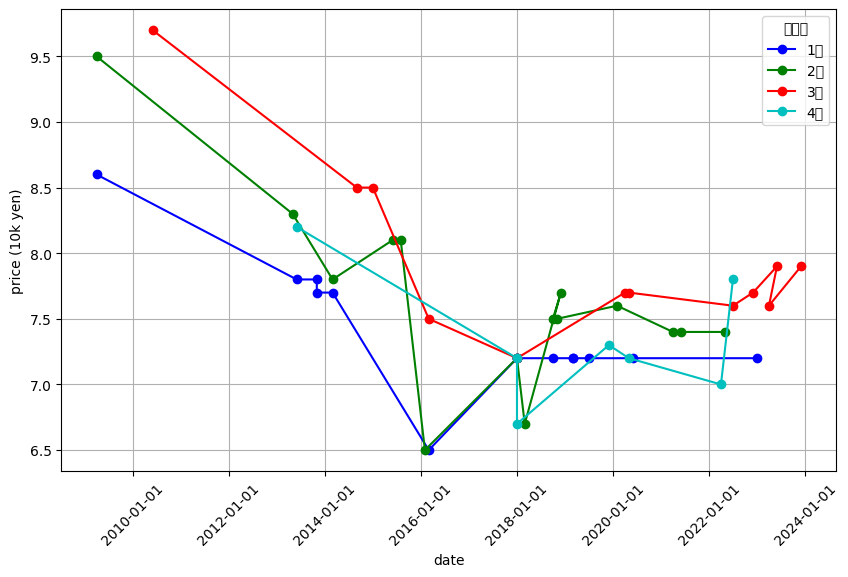

In [13]:
# 所在階ごとにグループ化
groups = df.groupby('所在階')

# 各所在階ごとにグラフを作成
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c']  # 所在階ごとの色を定義
labels = []  # 凡例用のラベルを格納するリスト
for i, (name, group) in enumerate(groups):
    plt.plot(group['release_date'], group['賃料'], marker='o', linestyle='-', color=colors[i])
    labels.append(name)  # 所在階のラベルをリストに追加
# グラフを作成
plt.xlabel('date')
plt.ylabel('price (10k yen)')
plt.grid(True)

# X軸の日付を見やすくするために、日付の表示形式を設定
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

plt.legend(labels, title='所在階')

# X軸のラベルが重ならないように回転
plt.xticks(rotation=45)

plt.show()

In [14]:
def japanese_to_english_floor(japanese_floor):
    # 日本語の階数を英語に変換する辞書を定義
    floor_mapping = {
        '1階': 'first floor',
        '2階': 'second floor',
        '3階': 'third floor',
        '4階': 'fourth floor',
        # 他の階数についても必要に応じて追加
    }

    # 辞書を使用して変換を行う
    english_floor = floor_mapping.get(japanese_floor, japanese_floor)

    return english_floor

In [15]:
df['floor'] = df['所在階'].apply(japanese_to_english_floor)
df['floor'].head()

0    third floor
1    third floor
2    third floor
3    first floor
4    third floor
Name: floor, dtype: object

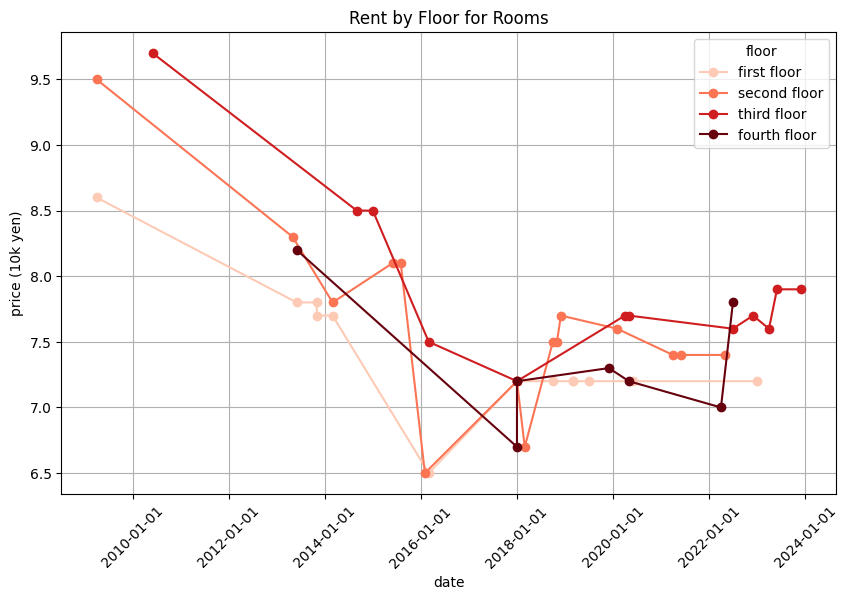

In [29]:
import numpy as np

# 所在階ごとにグループ化
groups = df.groupby('floor')

# 各所在階ごとにグラフを作成
plt.figure(figsize=(10, 6))

# 赤色の配色（色の濃さを変更）
colors = plt.cm.Reds(np.linspace(0.2, 1, len(groups)))

# 階数ごとのラベル順序を指定
floor_order = ['first floor', 'second floor', 'third floor', 'fourth floor']

labels = []  # 凡例用のラベルを格納するリスト

for floor in floor_order:
    group = groups.get_group(floor)
    plt.plot(group['release_date'], group['賃料'], marker='o', linestyle='-', color=colors[floor_order.index(floor)])
    labels.append(floor)  # 所在階のラベルをリストに追加

# グラフを作成
plt.title("Rent by Floor for Rooms")
plt.xlabel('date')
plt.ylabel('price (10k yen)')
plt.grid(True)

# X軸の日付を見やすくするために、日付の表示形式を設定
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

# 凡例を階数の順序で表示
plt.legend(labels, title='floor')

# X軸のラベルが重ならないように回転
plt.xticks(rotation=45)

plt.show()

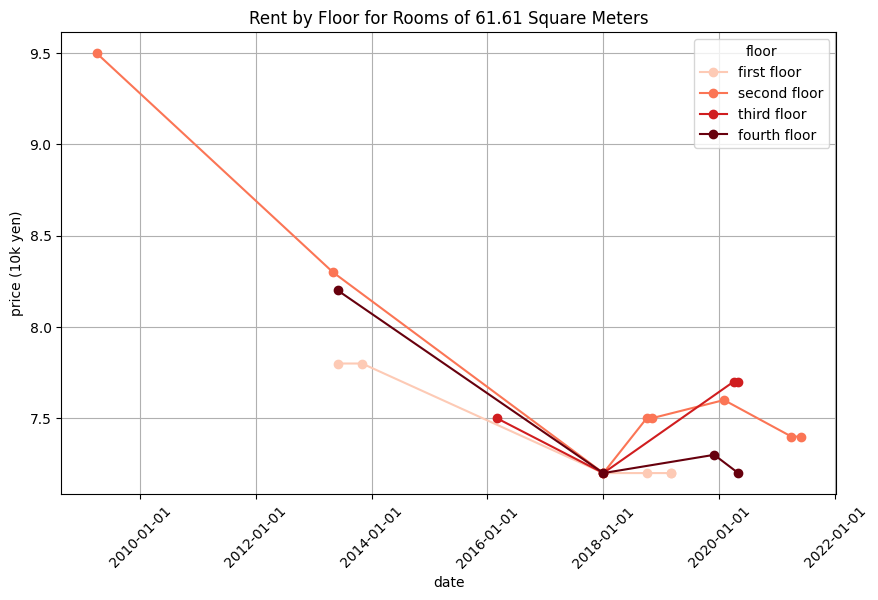

In [28]:
import numpy as np

# 所在階ごとにグループ化
groups = df[df['専有面積'] == "61.61m²"].groupby('floor')

# 各所在階ごとにグラフを作成
plt.figure(figsize=(10, 6))

# 赤色の配色（色の濃さを変更）
colors = plt.cm.Reds(np.linspace(0.2, 1, len(groups)))

# 階数ごとのラベル順序を指定
floor_order = ['first floor', 'second floor', 'third floor', 'fourth floor']

labels = []  # 凡例用のラベルを格納するリスト

for floor in floor_order:
    group = groups.get_group(floor)
    plt.plot(group['release_date'], group['賃料'], marker='o', linestyle='-', color=colors[floor_order.index(floor)])
    labels.append(floor)  # 所在階のラベルをリストに追加

# グラフを作成
plt.title("Rent by Floor for Rooms of 61.61 Square Meters")
plt.xlabel('date')
plt.ylabel('price (10k yen)')
plt.grid(True)

# X軸の日付を見やすくするために、日付の表示形式を設定
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

# 凡例を階数の順序で表示
plt.legend(labels, title='floor')

# X軸のラベルが重ならないように回転
plt.xticks(rotation=45)

plt.show()